## HW6-Q2

In [37]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

train_set=torchvision.datasets.FashionMNIST(root="./data",train=True,download=True,
                                            transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(train_set,batch_size=100,shuffle=True)

learning_rate=0.001
num_epochs=40

In [38]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1,self).__init__()
        self.hidden=nn.Linear(28*28,128)
        self.relu=nn.ReLU()
        self.output=nn.Linear(128,10)
    def forward(self,x):
        x=x.view(-1,28*28)
        x=self.hidden(x)
        x=self.relu(x)
        x=self.output(x)
        return x
    
class Model2(nn.Module):
    def __init__(self):
        super(Model2,self).__init__()
        self.hidden=nn.Linear(28*28,48)
        self.relu=nn.ReLU()
        self.dropout=nn.Dropout(0.2)
        self.output=nn.Linear(48,10)
    def forward(self,x):
        x=x.view(-1,28*28)
        x=self.hidden(x)
        x=self.relu(x)
        x=self.dropout(x)
        x=self.output(x)
        return x

In [39]:
def final_wights(model):
    weights_hidden=model.hidden.weight.detach().numpy().flatten()
    weights_outpurt=model.output.weight.detach().numpy().flatten()
    return weights_hidden,weights_outpurt

def plot_histogram(weights_hidden,weights_output,title):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(weights_hidden, bins=50, alpha=0.7)
    plt.title('Hidden Layer Weights')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    plt.hist(weights_output, bins=50, alpha=0.7)
    plt.title('Output Layer Weights')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.suptitle(title)
    plt.show()

### Model 1

Epoch 1:  running loss:350.0387229323387
Epoch 2:  running loss:253.21531301736832
Epoch 3:  running loss:228.11090353131294
Epoch 4:  running loss:211.82642583549023
Epoch 5:  running loss:197.74381721019745
Epoch 6:  running loss:188.72676077485085
Epoch 7:  running loss:179.23757431656122
Epoch 8:  running loss:172.65830976516008
Epoch 9:  running loss:165.5878498852253
Epoch 10:  running loss:161.36181253939867
Epoch 11:  running loss:155.6843022108078
Epoch 12:  running loss:151.33857349306345
Epoch 13:  running loss:146.36987422406673
Epoch 14:  running loss:142.17977952212095
Epoch 15:  running loss:137.88039484620094
Epoch 16:  running loss:134.36534622311592
Epoch 17:  running loss:130.93339972943068
Epoch 18:  running loss:127.753139346838
Epoch 19:  running loss:124.35137838870287
Epoch 20:  running loss:122.77036865800619
Epoch 21:  running loss:118.14901960641146
Epoch 22:  running loss:116.63690157979727
Epoch 23:  running loss:114.65617284551263
Epoch 24:  running loss:1

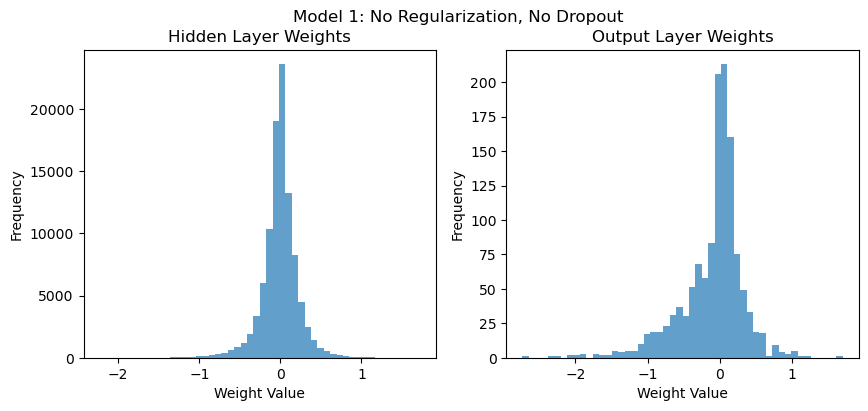

In [40]:
model_1=Model1()
    
loss_func_1=nn.CrossEntropyLoss()
optimizer_1=torch.optim.Adam(model_1.parameters(),lr=learning_rate)

for epoch in range(num_epochs):
    model_1.train()
    running_loss=0
    count=0
    for images,labels in train_loader:
        count+=1
        images=images.view(-1,28*28)
        outputs=model_1(images)
        loss=loss_func_1(outputs,labels)
        running_loss+=loss.item()
        optimizer_1.zero_grad()
        loss.backward()
        optimizer_1.step()
        #if count%100==0:
        #    print('iter {}: loss: {}'.format(count,loss.item()))
    print('Epoch {}:  running loss:{}'.format(epoch+1,running_loss))

weight_hidden_1,weight_output_1=final_wights(model_1)

plot_histogram(weight_hidden_1,weight_output_1,title='Model 1: No Regularization, No Dropout')


### Model 2

Epoch 1:  running loss:432.8510921597481
Epoch 2:  running loss:294.19424054026604
Epoch 3:  running loss:264.96625447273254
Epoch 4:  running loss:251.96432764828205
Epoch 5:  running loss:241.13772474229336
Epoch 6:  running loss:234.85241790115833
Epoch 7:  running loss:228.36463464796543
Epoch 8:  running loss:224.66773469746113
Epoch 9:  running loss:220.19999679923058
Epoch 10:  running loss:215.74759720265865
Epoch 11:  running loss:213.7591621428728
Epoch 12:  running loss:210.80267351865768
Epoch 13:  running loss:209.5185059159994
Epoch 14:  running loss:206.46534241735935
Epoch 15:  running loss:204.12598338723183
Epoch 16:  running loss:202.9848313331604
Epoch 17:  running loss:201.1302878111601
Epoch 18:  running loss:198.93640778958797
Epoch 19:  running loss:198.46974915266037
Epoch 20:  running loss:196.7248513251543
Epoch 21:  running loss:195.54534024000168
Epoch 22:  running loss:193.4704591035843
Epoch 23:  running loss:191.45627450942993
Epoch 24:  running loss:192

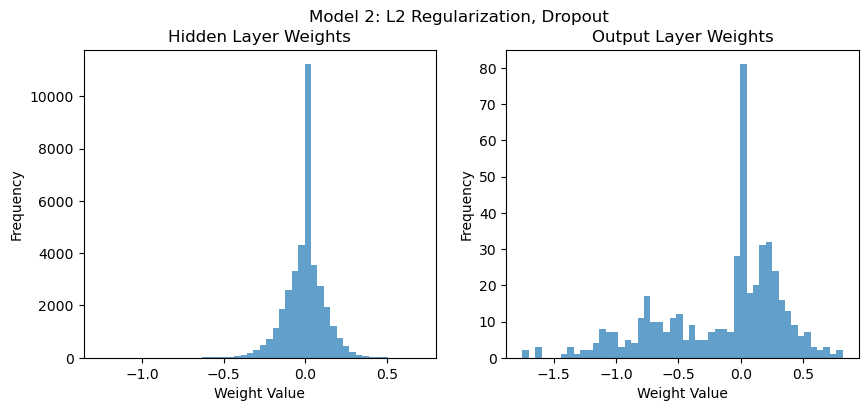

In [41]:
model_2=Model2()

l2_lambda=0.0001
loss_func_2=nn.CrossEntropyLoss()
optimizer_2=torch.optim.Adam(model_2.parameters(),lr=learning_rate,weight_decay=l2_lambda)

for epoch in range(num_epochs):
    model_2.train()
    running_loss=0
    count=0
    for images,labels in train_loader:
        count+=1
        images=images.view(-1,28*28)
        outputs=model_2(images)
        loss=loss_func_2(outputs,labels)
        running_loss+=loss.item()
        optimizer_2.zero_grad()
        loss.backward()
        optimizer_2.step()
        #if count%100==0:
        #    print('iter {}: loss: {}'.format(count,loss.item()))
    print('Epoch {}:  running loss:{}'.format(epoch+1,running_loss))

weight_hidden_2,weight_output_2=final_wights(model_2)

plot_histogram(weight_hidden_2,weight_output_2,title='Model 2: L2 Regularization, Dropout')

#### Q1: Describe the qualitative differences between these histograms. 
- **Model 1 (No regularization, no dropout)**:
  - The hidden layer weights have a relatively wide distribution range. Most weights are concentrated around 0, but the weights span approximately from -1 to 1.
  - The output layer weights also have a relatively wide distribution, with values approximately between -2 and 1.
  - Overall, Model 1’s weight distribution is more “spread out,” showing larger weight values, which is common when there is no regularization.

- **Model 2 (L2 regularization and dropout)**:
  - The hidden layer weights are more concentrated around 0, with a narrower range, with most weights between -0.5 and 0.5.
  - The output layer weights are similarly concentrated around 0 and have a smaller range compared to Model 1, mostly between -1.5 and 0.5.
  - In general, Model 2’s weight distribution is more “compressed,” with weights closer to 0.


#### Q2: What effect does regularization have on the distribution of weights
- **L2 Regularization** tends to penalize large weight values, encouraging weights to stay closer to 0. This results in the weights being more tightly clustered around 0 in Model 2, giving a narrower distribution.
  
- **Dropout** randomly “drops” neurons during training, which indirectly limits the size of the weights. The model needs to maintain performance despite the absence of certain neurons, thus contributing to limiting the weights’ magnitude.